# Network science
### Magister en Data Science

#### Instituto Data Science, Universidad del Desarrollo

By Hernan Rivera 

* Basado en el libro Think Complexity (versión 2.6.2) de Allen B. Downey y Green Tea Press

### Watts and Strogatz
In 1998 Duncan Watts and Steven Strogatz published a paper in Nature, “Collective dynamics of ‘small-world’ networks”, that proposed an explanation for the small world phenomenon

The aim of this notebook is build the Watts-Strogatz Graph based in the book code.

In [1]:
import numpy as np
import pandas as pd
import collections 
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
%matplotlib inline

In [3]:
ps = np.logspace(-4, 0, 9)
ps

array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00])

In [4]:
def run_one_graph(n, k, p):
    ws = nx.watts_strogatz_graph(n, k, p)
    mpl = characteristic_path_length(ws)
    cc = clustering_coefficient(ws)
    return mpl, cc

In [5]:
def run_experiment(ps, n=1000, k=10, iters=20):
    res = []
    for p in ps:
        t = [run_one_graph(n, k, p) for _ in range(iters)]
        means = np.array(t).mean(axis=0)
        res.append(means)
    return np.array(res)

In [6]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j:
                yield u, v

In [7]:
def path_lengths(G):
    length_map = dict(nx.shortest_path_length(G))
    lengths = [length_map[u][v] for u, v in all_pairs(G)]
    return lengths

In [8]:
def characteristic_path_length(G):
    return np.mean(path_lengths(G))

In [9]:
def node_clustering(G, u):
    neighbors = G[u]
    k = len(neighbors)
    if k < 2:
        return np.nan
    
    possible = k * (k-1) / 2
    exist = 0
    for v, w in all_pairs(neighbors):
        if G.has_edge(v, w):
            exist +=1
    return exist / possible

In [10]:
 def clustering_coefficient(G):
    cu = [node_clustering(G, node) for node in G]
    return np.nanmean(cu)

In [11]:
res = run_experiment(ps, 1000, 10, 20)

In [12]:
L, C = np.transpose(res)

In [13]:
L /= L[0]
C /= C[0]

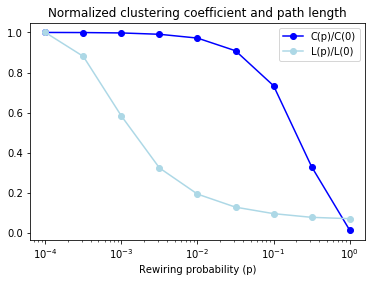

In [21]:
fig = plt.figure()
ax = plt.axes()

plt.title("Normalized clustering coefficient and path length")
plt.xlabel("Rewiring probability (p)")

ax.semilogx(ps, C, marker='o', color="blue",label="C(p)/C(0)")
ax.semilogx(ps, L, marker='o', color="lightblue",label="L(p)/L(0)")
ax.legend()

plt.show()